## Machine Learning Coursework (Part 1)

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.


## 1. Exploratory Data Analysis 

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
# print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

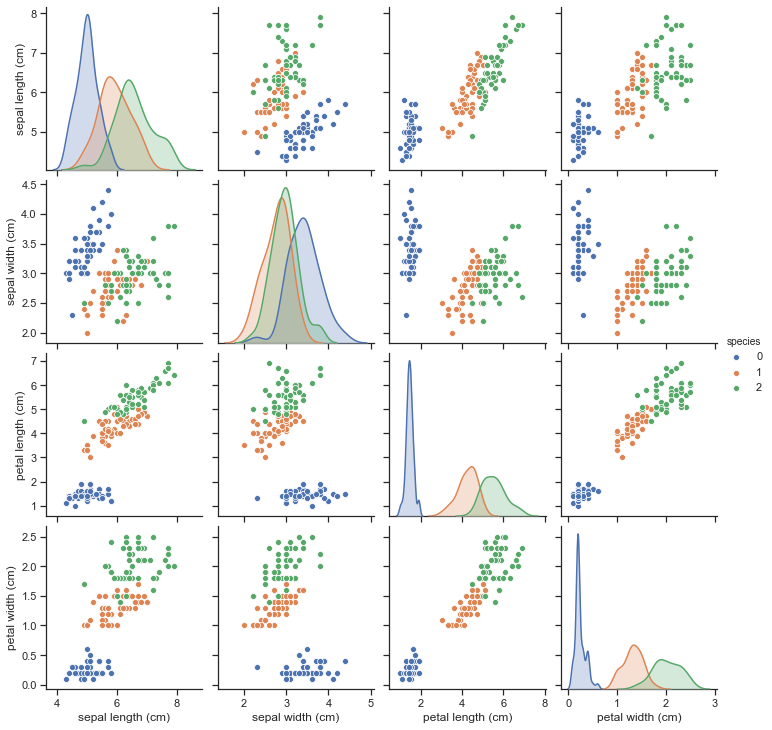

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [2]:
# define plotting function
import seaborn as sb

def myplotGrid(X,y):
    newLabel = 'type'
    df = pd.DataFrame(np.c_[X,y], columns = ['alcohol','flavanoids','color_intensity','ash', newLabel])
    sb.pairplot(df, hue = newLabel)

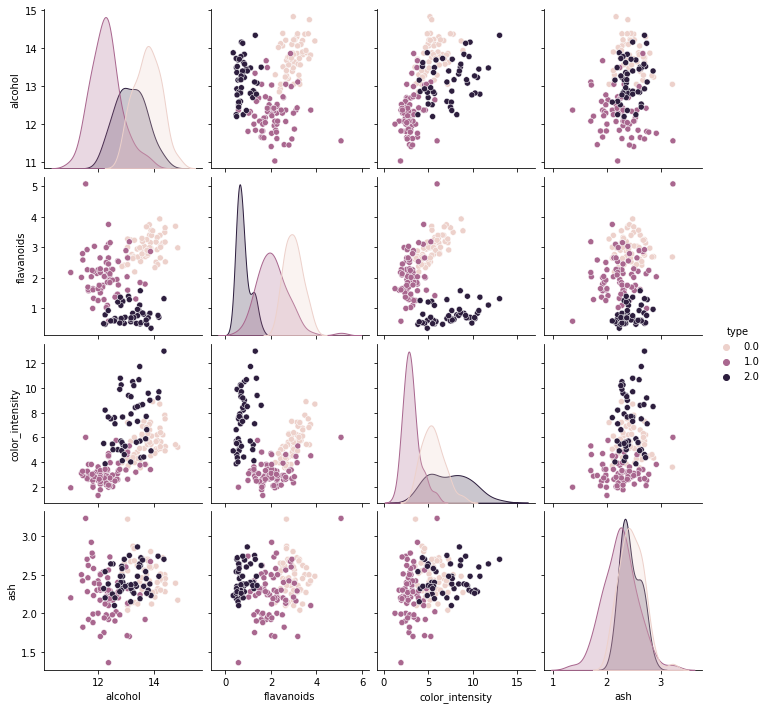

In [3]:
# run the plotting function
myplotGrid(X,y)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.6,X.shape)
    
and then invoke

    myplotGrid(XN,y)

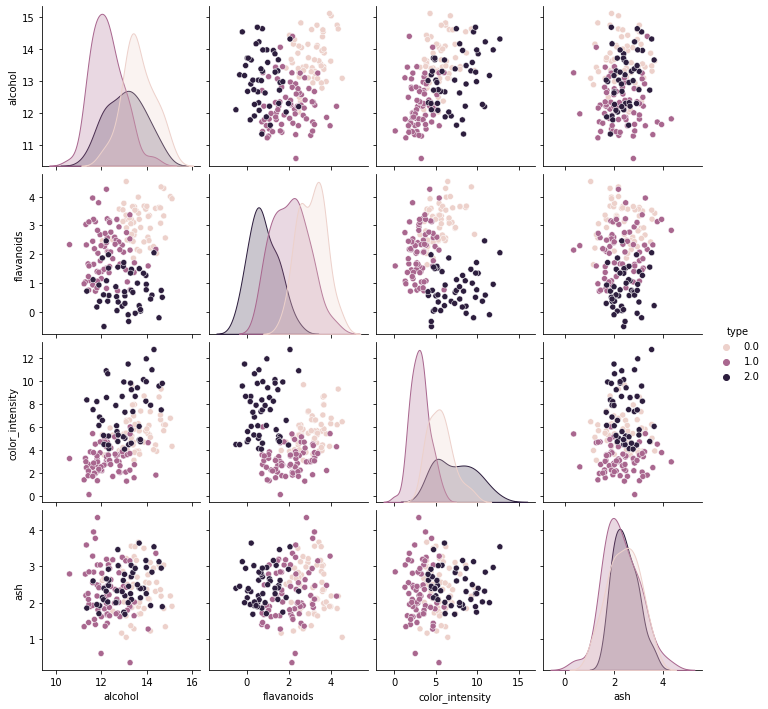

In [4]:
# noise code
mySeed = 12345 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.6,X.shape)
myplotGrid(XN,y)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer:

I would choose flavanoids and ash features. 
The plots of these features have experienced the most overall changes as compared to the rest. For the kernel density estimate(KDE) plot in noisy data for flavanoids by flavanoids, the distribution of all 3 labels(type) are significantly broader as as compared to the clean data plot. Label peaks(modes) are also overall higher. Label 0.0 and 1.0 has also deviated from a normal distribution while Label 2.0 has changed into a more normal distribution. For scatterplot of flavanoids by ash, the labels in the plot of noisy data has a weaker relationship and less outliers compared to clean data. For KDE plot of ash by ash, the labels in the plot of noisy data has an overall normal distribution compared to the clean data. Label 1.0 has also overtaken label 2.0 as the label with highest peak. For scatterplot of ash by flavanoids, the labels in the plot of noisy data has a weaker relationship and less outliers compared to clean data. As there is significant variation of the data for these two features, training a classifier with these features will allow the model to reduce overfitting of any particular dataset by using a regularised dataset(adding Gaussian noise to clean dataset). This will reduce generalisation error that occurs when predicting with previously unknown data and maintain a decent level of performance.



### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer:


The clean data without noise has scatterplots with stronger, clearer direction(positive or negative) relationships with a few outliers. Adding Gaussian noise has weakened the data relationship and direction in the scatterplots. Outliers have also been reduced. Examples are flavanoids by color_intensity and color_intensity by flavanoids plots. These strong, non-linear relationships have turned into moderate, almost linear relationships. In other plots which originally had moderate relationships can be said to have no relationships after adding noise. KDE plots have mostly seen subtle changes apart from the flavanoids by flavanoids plot, which broadened distributions and have higher peaks(modes), and ash by ash, which had a change of the label with highest peak. 



## 2. Implementing kNN 

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [33]:
# helper code

#calculates euclidean distance
def euclid_dist(train, test):
    """calculates euclidean distance"""
    dist = np.linalg.norm(train-test)
    return dist

#calculates manhattan distance
def manhattan_dist(train, test):
    """calculates manhattan distance"""
    dist = np.abs(train - test).sum()
    return dist

#filters and gets (nearest)neighbours within the k value 
def nearest_neighbours(distances,y, k):
    """filters and gets (nearest)neighbours within the k value """
    nearest = np.argsort(distances)[:k] 
    nearest_neighbours = y[nearest]
    return nearest_neighbours

#gets the class of the highest number of nearest neighbours within k value
def highest_neighbour_count(nearest_neighbours):
    """gets the class of the highest number of nearest neighbours within k value"""
    print(nearest_neighbours)
    classes,counts = np.unique(nearest_neighbours, return_counts=True)
    print(classes)
    print(counts)
    index = np.argmax(counts)
    
    return classes[index]

#splits dataset into train and test portions
def train_test_split(X, y, test_size):
    """splits dataset into train and test portions"""
    x_len = len(X)
    #shuffles entire dataset randomly
    shuffled = np.random.permutation(x_len)
    X_S = X[shuffled]
    y_S = y[shuffled]
    
    train_size = 1 - test_size
    #shuffles train portion of dataset
    train_shuffle = np.random.choice(x_len, int(x_len*train_size))
    X_train = X_S[train_shuffle]
    y_train = y_S[train_shuffle]
   
    #shuffles test portion of dataset
    test_shuffle = np.random.choice(x_len, int(x_len*test_size))
    X_test = X_S[test_shuffle]
    y_test = y_S[test_shuffle]
    return X_train, y_train, X_test, y_test


In [34]:
# mykNN code

def mykNN(X,y,X_,k,distance_type): 
    """k-nearest neighbour algorithm"""
    #list to store predictions
    predicted_knn = []
    #loop through data points for classification
    for point in X_: 
        #list to store distances
        distances = []
        #loop through training data portions
        for i in range(len(X)): 
            #check if distance_type variable is 'euclidean'
            if distance_type == 'euclidean':
                distance = euclid_dist(np.array(X[i]), point) 
                distances.append(distance) 
            #check if distance_type variable is 'manhattan'
            elif distance_type == 'manhattan':
                distance = manhattan_dist(np.array(X[i]), point) 
                distances.append(distance) 
        #convert list to numpy array        
        distances = np.array(distances) 
        #storing k range of neighbours
        k_neighbours = nearest_neighbours(distances,y, k)
        #prediction through filtering the class of highest number of nearest neighbours
        predicted = highest_neighbour_count(k_neighbours) 
        predicted_knn.append(predicted)
    return predicted_knn

#split dataset into 80% train and 20% test
X_train, y_train, X_test, y_test = train_test_split(X, y, 0.2)
y_ = mykNN(X_train, y_train, X_test, 5, 'euclidean')
print(y_)

[2 2 2 2 2]
[2]
[5]
[1 1 1 1 1]
[1]
[5]
[0 0 1 0 0]
[0 1]
[4 1]
[0 0 0 0 0]
[0]
[5]
[0 0 0 0 0]
[0]
[5]
[2 2 2 2 2]
[2]
[5]
[2 2 2 2 2]
[2]
[5]
[2 2 2 2 2]
[2]
[5]
[2 2 2 2 2]
[2]
[5]
[1 1 1 1 1]
[1]
[5]
[0 0 1 0 0]
[0 1]
[4 1]
[1 1 1 1 1]
[1]
[5]
[0 0 0 0 0]
[0]
[5]
[1 1 1 1 1]
[1]
[5]
[0 0 0 0 0]
[0]
[5]
[1 1 1 1 1]
[1]
[5]
[0 0 0 0 0]
[0]
[5]
[1 1 1 1 0]
[0 1]
[1 4]
[1 1 1 1 1]
[1]
[5]
[0 0 0 0 0]
[0]
[5]
[2 2 2 2 2]
[2]
[5]
[2 2 2 2 2]
[2]
[5]
[2 2 2 2 1]
[1 2]
[1 4]
[1 1 1 1 1]
[1]
[5]
[0 0 0 0 0]
[0]
[5]
[0 0 1 0 0]
[0 1]
[4 1]
[0 0 0 0 0]
[0]
[5]
[1 1 1 1 1]
[1]
[5]
[0 0 0 0 0]
[0]
[5]
[0 0 0 0 0]
[0]
[5]
[0 0 0 0 0]
[0]
[5]
[0 0 0 0 0]
[0]
[5]
[0 0 0 0 0]
[0]
[5]
[0 0 0 0 0]
[0]
[5]
[2 2 2 2 2]
[2]
[5]
[2, 1, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2]


## 3. Classifier evaluation 

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [7]:
# confusion matrix, accuracy, precision, recall, etc. 

#creates confusion matrix dimensionalised with number of classes using ground truth and knn prediction 
def confusion_matrices(y_ground,y_pred,class_num):
    """creates confusion matrix dimensionalised with number of classes using ground truth and knn prediction """
    c_matrix= np.zeros((class_num,class_num),dtype=int)
    for i in range(0,len(y_ground)):
            c_matrix[y_ground[i],y_pred[i]]+=1
    return c_matrix

#evaluates class-relative accuracy using confusion matrix
def accuracy_metric(c_matrix):
    """evaluates class-relative accuracy using confusion matrix"""
    true_positives = np.diag(c_matrix) 
    num_classes = len(true_positives)
    #sum of all true positives divided by total number of class instances
    accuracy = np.sum(true_positives)/np.sum(c_matrix)
    return accuracy

#evaluates class-relative precision using confusion matrix
def precision_metric(c_matrix):
    """evaluates class-relative precision using confusion matrix"""
    true_positives = np.diag(c_matrix) 
    num_classes = len(true_positives)
    #sum of all true positives and the sum of true positives and false positives, divided by number of classes
    precision = (np.sum(true_positives / np.sum(c_matrix, axis=0)))/ num_classes
    return precision

#evaluates class-relative recall using confusion matrix
def recall_metric(c_matrix):
    """evaluates class-relative recall using confusion matrix"""
    true_positives = np.diag(c_matrix) 
    num_classes = len(true_positives)
    #sum of all true positives and the sum of true positives and false negatives, divided by number of classes
    recall = (np.sum(true_positives / np.sum(c_matrix, axis=1)))/num_classes
    return recall

In [8]:
# test evaluation code

#number of classes or dimensions of a matrix
matrix_dimens = len(np.unique(y))
#confusion matrix
c_matrix = confusion_matrices(y_test,y_,matrix_dimens)
print("My result:")
print(c_matrix)
print('My accuracy: %s' %accuracy_metric(c_matrix))
print('My precision: %s' %precision_metric(c_matrix))
print('My recall: %s' %recall_metric(c_matrix))

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score 

print("\nsklearn result:")
print(confusion_matrix(y_test,y_))
print('library accuracy: %s' %accuracy_score(y_test,y_))
print('library precision: %s' % str(np.sum(precision_score(y_test,y_,average=None)/matrix_dimens)))
print('library recall: %s' % str(np.sum(recall_score(y_test,y_,average=None)/matrix_dimens)))

My result:
[[18  0  0]
 [ 0  8  0]
 [ 0  0  9]]
My accuracy: 1.0
My precision: 1.0
My recall: 1.0

sklearn result:
[[18  0  0]
 [ 0  8  0]
 [ 0  0  9]]
library accuracy: 1.0
library precision: 1.0
library recall: 1.0



## 4. Nested Cross-validation using your implementation of KNN  

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on **both** your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [9]:
# myNestedCrossVal code

# Split a dataset into k folds
def cross_validation_split(data, k_folds, seed):
    """Split a dataset into k folds"""
    #sets a seed for reproducible random number generation
    np.random.seed(seed)
    #creates an array of random permutation of indices between 0 and the length of X data portion
    indices = np.random.permutation(np.arange(0,len(data),1))
    #split the indices to k different folds
    bins = np.array_split(indices, k_folds)
    return bins

def myNestedCrossVal(X, y, k_folds, k_range, distances, seed):
    """Nested cross validation for finding best parameters"""
     #list to store accuracies folds
    test_accuracies=[]
    #list to store confusion matrices
    c_matrices = []
    #loop through outer test folds
    counterT = 1
    for i in range(0,k_folds):
        #list to store indicies for training on test fold evaluation
        outerFoldTrain=[]
        #list to store indicies for training with validation fold evaluation
        foldTrain=[] 
        #list to store indicies for testing
        foldTest=[] 
        #list to store indicies for validation
        foldValidate=[]
        #list containing lists of accuracy results using euclidean distance
        accuracy_fold_euclid=[]
        #list containing lists of accuracy results using manhattan distance
        accuracy_fold_manhattan=[]
        #split dataset
        bins = cross_validation_split(X, k_folds, seed)
        #create a test fold
        foldTest = bins[i]
        print("\n\nTest fold "+ str(counterT))
        #loop through inner validation and training folds
        counterV =1
        for j in range(0,k_folds):
            accuracies_euclid=[]
            accuracies_manhattan=[]
            #create a validate fold excluding the data portion allocated to test fold
            if j!=i:
                foldValidate = bins[j]
                #create training folds excluding data portions allocated to validate and test folds
                for k in range(0,k_folds):
                    if k!=j and k!=i:
                        foldTrain.extend(bins[k])
                print("\nValidation set "+ str(counterV)+ ": Accuracies for k values 1 to 10")
                #loop for k range of values
                for k in k_range:
                    #loop for the range of distance types
                    for distance in distances:
                        #predict using k-nn
                        y_pred=mykNN(X[foldTrain],y[foldTrain],X[foldValidate],k,distance)
                        #create confusion matrix for input into accuracy function next
                        c_matrix = confusion_matrices(y[foldValidate],y_pred,len(np.unique(y)))
                        #sift distance types to add accuracy result to respective accuracy lists
                        if distance == 'euclidean':
                            accuracies_euclid.append(accuracy_metric(c_matrix))
                        elif distance == 'manhattan':
                            accuracies_manhattan.append(accuracy_metric(c_matrix))
                #add accuracy lists for the full validation train cycle into a list
                accuracy_fold_euclid.append(accuracies_euclid)
                accuracy_fold_manhattan.append(accuracies_manhattan)
                counterV = counterV + 1
                print('euclidean',accuracies_euclid)
                print('manhattan',accuracies_manhattan)
                
        #this segment extracts the best parameters(k value and distance type) from each full validation and train cycle
        #instantiate lists to store sum of accuracies for each k value over the full validation and train cycle
        accuracies_sum_euclid = [0]*len(k_range)
        accuracies_sum_manhattan = [0]*len(k_range)
        #loop through length of k value range
        for k in range(0,len(k_range)):
            #loop through number of validation and test folds
            for j in range(0,k_folds -1):
                #sums the accuracies for each k value from every validate and train fold into a single value
                accuracies_sum_euclid[k] = accuracies_sum_euclid[k] + accuracy_fold_euclid[j][k]
                accuracies_sum_manhattan[k] = accuracies_sum_manhattan[k] + accuracy_fold_manhattan[j][k]
        #find the highest accuracy value
        highest_accuracy_euclid = max(accuracies_sum_euclid)
        highest_accuracy_manhattan = max(accuracies_sum_manhattan)
        best_k = 0
        best_accuracy = 0.0
        best_distance = ''
        #finds the k value, accuracy and distance type of the highest accuracy 
        if highest_accuracy_euclid >= highest_accuracy_manhattan:
            best_k = accuracies_sum_euclid.index(highest_accuracy_euclid) + 1
            best_accuracy = highest_accuracy_euclid 
            best_distance = distances[0]
        else:
            best_k = accuracies_sum_manhattan.index(highest_accuracy_manhattan) + 1
            best_accuracy = highest_accuracy_manhattan
            best_distance = distances[1]
        print("\nValidation and training folds evaluation for test fold "+ str(counterT)+"\nBest accuracy: "+str(best_accuracy/(k_folds -1)),"Best k: " + str(best_k), "Distance: " + best_distance)    
        counterT = counterT +1        
        
        #this segment inputs best parameters into evaluating knn algorithm with testing fold
        #loop through all folds
        for j in range(0,k_folds):
            #create training folds excluding test fold
            if j!=i: 
                outerFoldTrain.extend(bins[j])
        #evaluate using k-nn
        y_pred=mykNN(X[outerFoldTrain],y[outerFoldTrain],X[foldTest],best_k,best_distance)
        #create confusion matrix for input into accuracy function next
        c_matrix = confusion_matrices(y[foldTest],y_pred,len(np.unique(y)))
        #generates accuracy
        accuracy = accuracy_metric(c_matrix)
        #adds confusion matrix into list of confusion matrices
        c_matrices.append(c_matrix)
        #adds accuracy result into list of accuracy per test fold
        test_accuracies.append(accuracy)
        print("Accuracy after test fold evaluation: "+str(accuracy), "\nConfusion matrix:", "\n",c_matrix)
    return c_matrices, test_accuracies


In [10]:
# evaluate clean data code
c_matrices_clean, accuracies_fold_clean = myNestedCrossVal(X, y, 5, list(range(1,11)), ['euclidean','manhattan'], 50)



Test fold 1

Validation set 1: Accuracies for k values 1 to 10
euclidean [0.9166666666666666, 0.9166666666666666, 0.9444444444444444, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.9166666666666666, 0.8888888888888888, 0.9166666666666666, 0.9166666666666666]
manhattan [0.9444444444444444, 0.9166666666666666, 0.9166666666666666, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666]

Validation set 2: Accuracies for k values 1 to 10
euclidean [1.0, 1.0, 0.9722222222222222, 0.9722222222222222, 0.9444444444444444, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222]
manhattan [1.0, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9444444444444444, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9444444444444444]

Validation set 3: Accuracies for k values 1 to 10
euclidean [1.0, 1.0, 1.0, 0.971428

euclidean [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222]
manhattan [1.0, 1.0, 1.0, 0.9722222222222222, 1.0, 1.0, 1.0, 0.9722222222222222, 0.9722222222222222, 0.9444444444444444]

Validation set 4: Accuracies for k values 1 to 10
euclidean [1.0, 1.0, 1.0, 1.0, 1.0, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714]
manhattan [1.0, 1.0, 1.0, 1.0, 1.0, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714]

Validation and training folds evaluation for test fold 5
Best accuracy: 0.9930555555555556 Best k: 3 Distance: euclidean
Accuracy after test fold evaluation: 0.9142857142857143 
Confusion matrix: 
 [[ 8  0  0]
 [ 2 14  0]
 [ 0  1 10]]


In [11]:
# evaluate noisy data code
c_matrices_noisy, accuracies_fold_noisy =myNestedCrossVal(XN, y, 5, list(range(1,11)), ['euclidean','manhattan'], 50)



Test fold 1

Validation set 1: Accuracies for k values 1 to 10
euclidean [0.8888888888888888, 0.8333333333333334, 0.9166666666666666, 0.8888888888888888, 0.9166666666666666, 0.9166666666666666, 0.9444444444444444, 0.9166666666666666, 0.9166666666666666, 0.8888888888888888]
manhattan [0.9166666666666666, 0.8333333333333334, 0.9444444444444444, 0.8888888888888888, 0.9166666666666666, 0.9166666666666666, 0.9444444444444444, 0.9166666666666666, 0.9444444444444444, 0.9166666666666666]

Validation set 2: Accuracies for k values 1 to 10
euclidean [1.0, 0.9722222222222222, 0.8611111111111112, 0.9166666666666666, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8611111111111112, 0.8888888888888888, 0.9166666666666666]
manhattan [1.0, 0.9722222222222222, 0.8611111111111112, 0.9166666666666666, 0.9166666666666666, 0.8888888888888888, 0.8611111111111112, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888]

Validation set 3: Accuracies for k values 1 to 10
euclidean [1.0, 1.0

euclidean [1.0, 1.0, 1.0, 0.9444444444444444, 0.9166666666666666, 0.9166666666666666, 0.9444444444444444, 0.9722222222222222, 0.9722222222222222, 0.9444444444444444]
manhattan [1.0, 1.0, 1.0, 1.0, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9444444444444444, 0.9444444444444444, 0.9166666666666666]

Validation set 4: Accuracies for k values 1 to 10
euclidean [1.0, 1.0, 1.0, 1.0, 1.0, 0.9428571428571428, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143]
manhattan [1.0, 1.0, 1.0, 1.0, 1.0, 0.9428571428571428, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143]

Validation and training folds evaluation for test fold 5
Best accuracy: 0.9861111111111112 Best k: 1 Distance: euclidean
Accuracy after test fold evaluation: 0.8571428571428571 
Confusion matrix: 
 [[ 7  0  1]
 [ 1 15  0]
 [ 0  3  8]]


In [12]:
# Print the summaries
print("Clean data confusion matrices")
print(*c_matrices_clean,sep = '\n\n')
print("List of acccuracy per fold after choosing best parameters from validation and training:\n",accuracies_fold_clean)

print("\nNoisy data confusion matrices")
print(*c_matrices_noisy,sep = '\n\n')
print("List of acccuracy per fold after choosing best parameters from validation and training:\n",accuracies_fold_noisy)

Clean data confusion matrices
[[11  2  0]
 [ 0 14  0]
 [ 0  0  9]]

[[ 7  0  0]
 [ 1 14  0]
 [ 0  1 13]]

[[18  0  0]
 [ 2 11  0]
 [ 0  0  5]]

[[13  0  0]
 [ 2 10  1]
 [ 0  0  9]]

[[ 8  0  0]
 [ 2 14  0]
 [ 0  1 10]]
List of acccuracy per fold after choosing best parameters from validation and training:
 [0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9142857142857143, 0.9142857142857143]

Noisy data confusion matrices
[[11  2  0]
 [ 0 14  0]
 [ 0  0  9]]

[[ 7  0  0]
 [ 3 12  0]
 [ 0  0 14]]

[[13  4  1]
 [ 0 12  1]
 [ 0  0  5]]

[[11  2  0]
 [ 0 11  2]
 [ 0  0  9]]

[[ 7  0  1]
 [ 1 15  0]
 [ 0  3  8]]
List of acccuracy per fold after choosing best parameters from validation and training:
 [0.9444444444444444, 0.9166666666666666, 0.8333333333333334, 0.8857142857142857, 0.8571428571428571]


## 5. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.9444444444444444   |  1 | manhattan  |
| 2 | 0.9444444444444444   |  1 | euclidean  |
| 3 | 0.9444444444444444   |  2 | euclidean  |
| 4 | 0.9142857142857143  |  2 | euclidean  |
| 5 | 0.9142857142857143  |  3 | euclidean  |
| **total** | 0.9323809523809523 $\pm$ 0.01651861681364787 |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.9444444444444444  |  1 | manhattan  |
| 2 | 0.9166666666666666  |  1 | euclidean  |
| 3 | 0.8333333333333334  |  1 | manhattan  |
| 4 | 0.8857142857142857  |  1 | euclidean  |
| 5 | 0.8571428571428571  |  1 | euclidean  |
| **total** | 0.8874603174603175 $\pm$ 0.04458735526959421 |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


CLEAN
Combined summary confusion matrix:
Class-relative precision: 0.9365489705726686
Class-relative recall: 0.9372529906368531


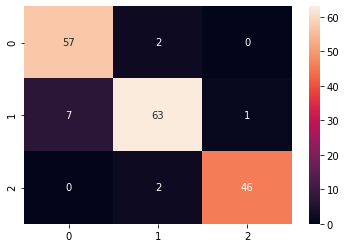

In [13]:
# clean data summary results
print('CLEAN')
print('Combined summary confusion matrix:')
c_matrix_clean = c_matrices_clean[0]
#combine list of confusion matrices into one confusion matrix
for i in range(1, len(c_matrices_clean)):
    c_matrix_clean = c_matrix_clean + c_matrices_clean[i]
sb.heatmap(c_matrix_clean, annot=True)
print('Class-relative precision: %s' %precision_metric(c_matrix_clean))
print('Class-relative recall: %s' %recall_metric(c_matrix_clean))


NOISY
Combined summary confusion matrix:
Class-relative precision: 0.8926205450733753
Class-relative recall: 0.8898056417601655


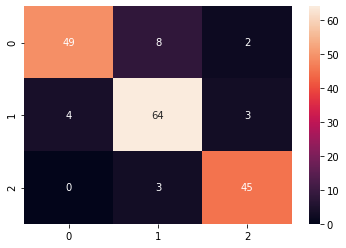

In [14]:
# noisy data summary results
print('NOISY')
print('Combined summary confusion matrix:')
c_matrix_noisy = c_matrices_noisy[0]
#combine list of confusion matrices into one confusion matrix
for i in range(1, len(c_matrices_noisy)):
    c_matrix_noisy = c_matrix_noisy + c_matrices_noisy[i]
sb.heatmap(c_matrix_noisy, annot=True)
print('Class-relative precision: %s' %precision_metric(c_matrix_noisy))
print('Class-relative recall: %s' %recall_metric(c_matrix_noisy))

## 6. More questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer:


The best parameters do change when noise is added. For the best k values in the clean data folds, there is a variation of values from 1 to 3. For the noisy data folds, the best k values for all folds are 1. The only same distance type by folds of the two datasets is euclidean of fold 2.
Referencing the two tables above, one can say that the highest appearances of a certain k value and distance type is 1 and euclidean respectively. K value of 1 accounts for 2/5 of the clean data folds and euclidean for 4/5. The other k values represented in the clean data folds are also not far off in the context of k range(1 to 10), with the highest k value 3 being only 2 counts away from value of 1. For the noisy data, k value of 1 accounts for all 5 folds and euclidean 3/5. It is reasonable to consider that this set of parameter choice would be better able to achieve an overall decent result on either the clean or noisy dataset.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:


The tie can be broken by decreasing the number of neighbours by 1 until a clear decision can be reached. In this case the number 2 can be decremented to 1. In my implementation, the array which stores nearest neighbours elements can be reduced by one length of 1 from the back.

Below is the helper function that handles evaluation of classes from the nearest neighbours

def highest_neighbour_count(nearest_neighbours):

    """gets the class of the highest number of nearest neighbours within k value"""
    
    # gets classes type array and array of count value
    classes,counts = np.unique(nearest_neighbours, return_counts=True) 
    
        # set a variable to nearest neighbours array
        tie_broken_neighbours = nearest_neighbours 
        
    # condition to check counts array for more than 1 class and equal counts for multiple classes
    while len(counts) > 1 and np.max(counts) == np.min(counts): 
        
        # reduces nearest neighbours array by 1 element from the back
        tie_broken_neighbours = nearest_neighbours[:len(nearest_neighbours)-1]  
        
        # gets classes array and array of count value
        classes,counts = np.unique(tie_broken_neighbours, return_counts=True)
        
    # index of selected class type   
    index = np.argmax(counts)
    
    # returns selected class type
    return classes[index]

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer:

 I have run the k-nn algorithm on the Iris dataset below. The results seem reasonable and the algorithm does not seem to be overfitting any particular set of data(Wine, Wine with noise, Iris) as the performance across all 3 datasets are similarly decent. I do not think that the code would require any changes.


Load Iris dataset and features.

In [15]:
# load data
iris=datasets.load_iris()
# print(iris.DESCR)

df_iris = pd.DataFrame(iris.data, columns = iris.feature_names )
selected_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# extract the data as numpy arrays of features, X_i, and target, y_i
X_i = df_iris[selected_features].values
y_i = iris.target

Run k-nn and output performance metrics.

In [16]:
X_train_i, y_train_i, X_test_i, y_test_i = train_test_split(X_i, y_i, 0.2)
y_i_ = mykNN(X_train_i, y_train_i, X_test_i, 5, 'euclidean')

#number of classes or dimensions of a matrix
matrix_dimens_i = len(np.unique(y_i))
#confusion matrix
c_matrix_i = confusion_matrices(y_test_i,y_i_,matrix_dimens_i)
print("My result:")
print(c_matrix_i)
print('My accuracy: %s' %accuracy_metric(c_matrix_i))
print('My precision: %s' %precision_metric(c_matrix_i))
print('My recall: %s' %recall_metric(c_matrix_i))

My result:
[[13  0  0]
 [ 0  6  1]
 [ 0  0 10]]
My accuracy: 0.9666666666666667
My precision: 0.9696969696969697
My recall: 0.9523809523809524


Apply a nested cross validation.

In [17]:
print(len(X_i),len(y_i))
c_matrices, accuracies_fold =myNestedCrossVal(X_i, y_i, 5, list(range(1,11)), ['euclidean','manhattan'], 100)

150 150


Test fold 1

Validation set 1: Accuracies for k values 1 to 10
euclidean [0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9666666666666667]
manhattan [0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333]

Validation set 2: Accuracies for k values 1 to 10
euclidean [1.0, 0.9666666666666667, 0.9, 0.9, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9]
manhattan [1.0, 0.9333333333333333, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8666666666666667]

Validation set 3: Accuracies for k values 1 to 10
euclidean [1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333]
manhattan [1.0, 1.0, 1.0,

Print summary confusion matrix.

Combined summary confusion matrix:
Class-relative precision: 0.96
Class-relative recall: 0.96


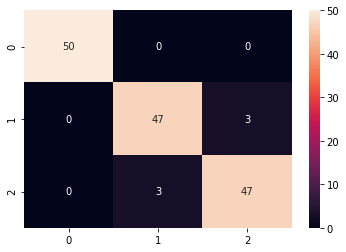

In [18]:
print('Combined summary confusion matrix:')
c_matrix_i = c_matrices[0]
#combine list of confusion matrices into one confusion matrix
for i in range(1, len(c_matrices)):
    c_matrix_i = c_matrix_i + c_matrices[i]
sb.heatmap(c_matrix_i, annot=True)
print('Class-relative precision: %s' %precision_metric(c_matrix_i))
print('Class-relative recall: %s' %recall_metric(c_matrix_i))